In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("loan.csv")
df.shape

(39717, 111)

In [4]:
df = pd.read_csv('loan.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
miss_val_perc = round(df.isnull().sum()/len(df.index)*100,2)
miss_val_perc

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
remove = []
for i in range(len(miss_val_perc)):
    if(miss_val_perc[i]> 80):
        remove.append(miss_val_perc.index[i])
df=df.drop(columns=remove)

In [8]:
df.shape

(39717, 55)

In [9]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [10]:
df["emp_length"]=df["emp_length"].str.rstrip("years")
df['emp_length'].describe()

count     38642
unique       11
top        10+ 
freq       8879
Name: emp_length, dtype: object

In [11]:
df['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [12]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))
df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [13]:
df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [14]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [15]:
df = df[~(df['loan_status']=='Current')]
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
behavior = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','collections_12_mths_ex_med',\
            'chargeoff_within_12_mths','pub_rec','recoveries','last_credit_pull_d','tax_liens','pub_rec_bankruptcies','url','desc']

In [17]:
df = df.drop(columns=behavior,axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,3,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,3,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,2,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,9,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,1,INDIVIDUAL,0,0


In [18]:
columns = df.columns.to_list()
print(columns)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [19]:
round(df.isnull().sum()/len(df.index)*100,2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
open_acc                   0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
initial_list_status        0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

In [20]:
df['emp_title'].describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

In [21]:
mode_emp_title = df['emp_title'].mode()[0]
df['emp_title'] = df['emp_title'].fillna(mode_emp_title)
df['emp_title'].isnull().sum()

0

In [22]:
df['emp_length'].describe()

count     37544
unique       11
top        10+ 
freq       8488
Name: emp_length, dtype: object

In [23]:
mode_emp_length = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(mode_emp_length)
df['emp_length'].isnull().sum()

0

In [24]:
df['title'].describe()

count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

In [25]:
mode_title = df['title'].mode()[0]
df['title'] = df['title'].fillna(mode_title)
df['title'].isnull().sum()

0

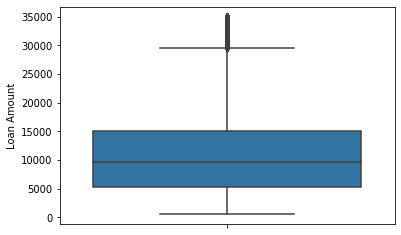

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [26]:
sns.boxplot(y=df["loan_amnt"])
plt.ylabel("Loan Amount")
plt.show()
df["loan_amnt"].describe()

#### The loan amount varies between the range 500 to 35000 with the median 9600

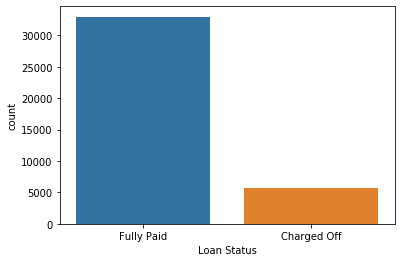

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [27]:
sns.countplot(x=df["loan_status"])
plt.xlabel("Loan Status")
plt.show()
df["loan_status"].describe()
df["loan_status"].value_counts()

#### 32950 loans are fully paid while 5627 loans are defaulted which is approximately 14.59% of the loans offered

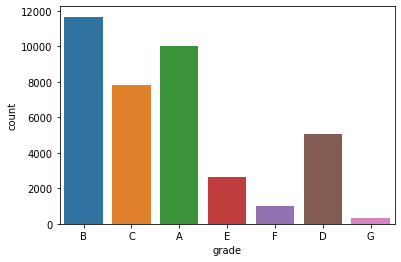

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [28]:
sns.countplot(x="grade", data=df)
plt.show()
df["grade"].value_counts()

#### Most of the loans are graded as B(11675), followed by A(10045) and then by C(7834)

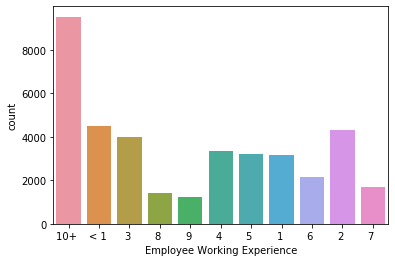

10+     9521
< 1     4508
2       4291
3       4012
4       3342
5       3194
1       3169
6       2168
7       1711
8       1435
9       1226
Name: emp_length, dtype: int64

In [29]:
sns.countplot(x=df['emp_length'])
plt.xlabel('Employee Working Experience')
plt.show()
df["emp_length"].value_counts()

#### Majority of the loanees have an experience of more than 10 years

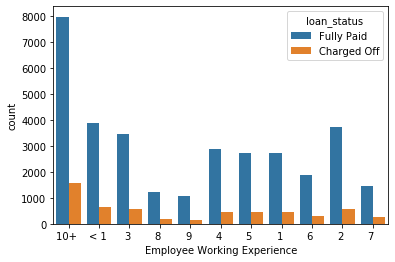

In [30]:
sns.countplot(x="emp_length", hue="loan_status", data=df)
plt.xlabel("Employee Working Experience")
plt.show()

In [31]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,3,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,3,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,2,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,9,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,1,INDIVIDUAL,0,0


#### People with more than 10 years of experience also default more as compared to the others

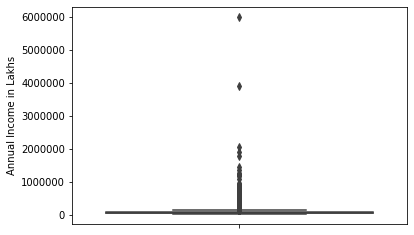

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [32]:
sns.boxplot(y=df["annual_inc"])
plt.ylabel("Annual Income in Lakhs")
plt.show()
df["annual_inc"].describe()

In [33]:
df['annual_inc'].quantile(0.985)

200000.0

#### 98.5% of the loanees have an annual income less than 2 Lacs

Removing the income values above 2 Lacs from the dataframe\
Binning the annual income into 4 types viz. Low, Moderate, High and very high

In [34]:
def inc_bin(val):
    if(val<50000):
        return 'Low'
    elif(val<100000):
        return 'Moderate'
    elif(val<150000):
        return 'High'
    else:
        return 'Very High'

In [35]:
df['income_type'] = df['annual_inc'].apply(inc_bin)

In [106]:
income_type = df['income_type'].value_counts()
income_type

Moderate     18238
Low          14360
High          4270
Very High     1709
Name: income_type, dtype: int64

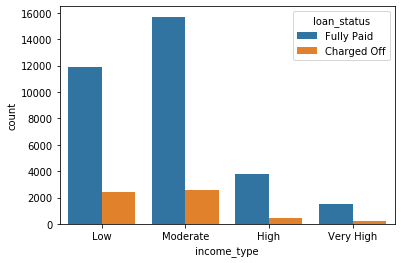

In [37]:
sns.countplot(x = 'income_type', hue='loan_status',data=df)
plt.show()

In [109]:
low = df[(df['income_type']=='Low')&(df['loan_status']=='Charged Off')].shape[0]
moderate = df[(df['income_type']=='Moderate')&(df['loan_status']=='Charged Off')].shape[0]
high = df[(df['income_type']=='High')&(df['loan_status']=='Charged Off')].shape[0]
vhigh = df[(df['income_type']=='Very High')&(df['loan_status']=='Charged Off')].shape[0]
low_co = round(low/income_type[1]*100,2)
moderate_co = round(moderate/income_type[0]*100,2)
high_co = round(high/income_type[2]*100,2)
vhigh_co = round(vhigh/income_type[3]*100,2)

In [111]:
print('Charged off customers having low income: {}%'.format(low_co))
print('Charged off customers having moderate income: {}%'.format(moderate_co))
print('Charged off customers having high income: {}%'.format(high_co))
print('Charged off customers having very income: {}%'.format(vhigh_co))

Charged off customers having low income: 17.05%
Charged off customers having moderate income: 13.89%
Charged off customers having high income: 10.66%
Charged off customers having very income: 11.06%


#### Customers having low income (< 50000) tend to default on their loan as compared to other customers

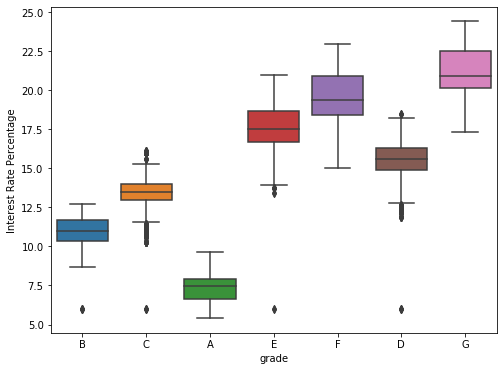

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['int_rate'], x=df['grade'])
plt.ylabel('Interest Rate Percentage')
plt.show()

#### Grade G loans are the riskiest and hence have a higher Interest Rate Percentage

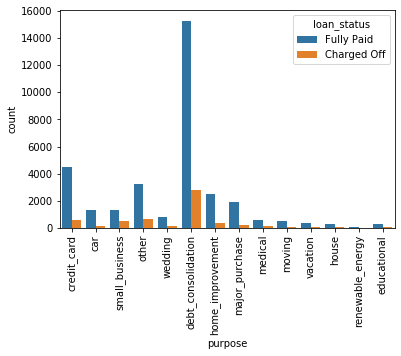

In [39]:
sns.countplot(x="purpose", hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

#### The highest number of loans have been offered for Debt_Consolidation out of which approximately 16% are defaulted

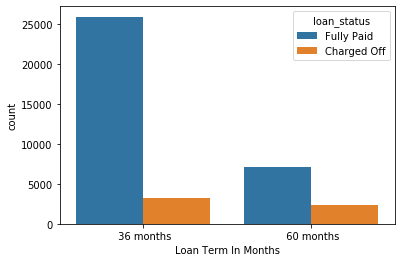

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [40]:
sns.countplot(x="term", hue="loan_status", data=df)
plt.xlabel("Loan Term In Months")
plt.show()
df["term"].value_counts()

#### Short tenure loans(36 months) are generally more completed as compared to long term ones(60 months)

In [41]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,income_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,3,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,1,INDIVIDUAL,0,0,Low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,3,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,1,INDIVIDUAL,0,0,Low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,2,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,1,INDIVIDUAL,0,0,Low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0,Low
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,9,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,1,INDIVIDUAL,0,0,Low


In [79]:
home_ownership = df['home_ownership'].value_counts()
home_ownership

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

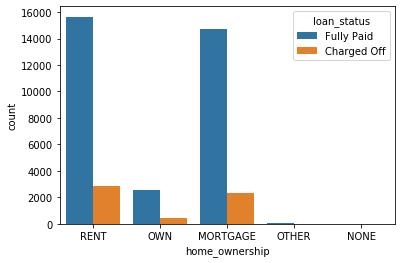

In [43]:
sns.countplot(df['home_ownership'],hue=df['loan_status'])
plt.show()

Calculating % of Charged off customers on the basis of home ownership

In [82]:
rent = df[(df['home_ownership']=='RENT')&(df['loan_status']=='Charged Off')].shape[0]
own = df[(df['home_ownership']=='OWN')&(df['loan_status']=='Charged Off')].shape[0]
mortgage = df[(df['home_ownership']=='MORTGAGE')&(df['loan_status']=='Charged Off')].shape[0]
rent_co = round(rent/home_ownership[0]*100,2)
mortgage_co = round(mortgage/home_ownership[1]*100,2)
own_co = round(own/home_ownership[2]*100,2)

In [83]:
print('Charged off customers who live in rented house: {}%'.format(rent_co))
print('Charged off customers who own the house: {}%'.format(own_co))
print('Charged off customers who live in mortgaged house: {}%'.format(mortgage_co))

Charged off customers who live in rented house: 15.36%
Charged off customers who own the house: 14.89%
Charged off customers who live in mortgaged house: 13.67%


The % trends are similar for type of home ownership of customers. But, customers who live in rented house tend to default more as compared to other customers

In [44]:
df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [45]:
top_states = df['addr_state'].value_counts().head()
top_states

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
Name: addr_state, dtype: int64

In [46]:
df_topstate = df[(df['addr_state']=='CA')|(df['addr_state']=='NY')|(df['addr_state']=='FL')|(df['addr_state']=='TX')|\
                (df['addr_state']=='NJ')]

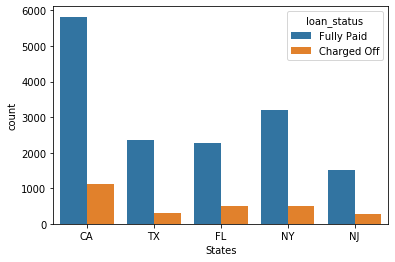

In [112]:
sns.countplot(x='addr_state',hue='loan_status',data=df_topstate)
plt.xlabel('States')
plt.show()

Calculating % of charged off customers from top 5 states listed above

In [77]:
ca = df_topstate[(df_topstate['addr_state']=='CA')&(df_topstate['loan_status']=='Charged Off')].shape[0]
ny = df_topstate[(df_topstate['addr_state']=='NY')&(df_topstate['loan_status']=='Charged Off')].shape[0]
fl = df_topstate[(df_topstate['addr_state']=='FL')&(df_topstate['loan_status']=='Charged Off')].shape[0]
tx = df_topstate[(df_topstate['addr_state']=='TX')&(df_topstate['loan_status']=='Charged Off')].shape[0]
nj = df_topstate[(df_topstate['addr_state']=='NJ')&(df_topstate['loan_status']=='Charged Off')].shape[0]
ca_co = round(ca/top_states[0]*100,2)
ny_co = round(ny/top_states[0]*100,2)
fl_co = round(fl/top_states[0]*100,2)
tx_co = round(tx/top_states[0]*100,2)
nj_co = round(nj/top_states[0]*100,2)

In [78]:
print('Charged off customers in CA: {}%'.format(ca_co))
print('Charged off customers in NY: {}%'.format(ny_co))
print('Charged off customers in FL: {}%'.format(fl_co))
print('Charged off customers in TX: {}%'.format(tx_co))
print('Charged off customers in NJ: {}%'.format(nj_co))

Charged off customers in CA: 16.19%
Charged off customers in NY: 7.12%
Charged off customers in FL: 7.25%
Charged off customers in TX: 4.55%
Charged off customers in NJ: 4.0%


There are large no of customers from California and also they tend to default more than any other customers from another states

In [48]:
df_topstate.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,income_type
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0,Low
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,4,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,Jan-15,111.34,1,INDIVIDUAL,0,0,Low
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,US Army,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,11,5210,32.60%,13,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,2.09,Apr-12,152.39,1,INDIVIDUAL,0,0,Low
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,2,9279,36.50%,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,2.52,Nov-12,121.45,1,INDIVIDUAL,0,0,Low
11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,B5,UCLA,10+,OWN,75000.0,Source Verified,Dec-11,Fully Paid,n,debt_consolidation,Consolidation,913xx,CA,10.78,12,23336,67.10%,34,f,0.0,0.0,13947.989160,13947.99,12000.00,1947.99,0.00,0.00,Sep-13,6315.30,1,INDIVIDUAL,0,0,Moderate


In [52]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,income_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,3,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,1,INDIVIDUAL,0,0,Low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,3,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,1,INDIVIDUAL,0,0,Low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,2,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,1,INDIVIDUAL,0,0,Low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0,Low
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,9,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,1,INDIVIDUAL,0,0,Low


In [60]:
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [61]:
df['loan_amnt'].quantile(0.95)

25000.0

95% of loan amounts fall below 25000\
Hence, binning the loan amounts as we did for the income amount

In [62]:
def loan_bin(val):
    if(val<5000):
        return 'Low'
    elif(val<15000):
        return 'Moderate'
    else:
        return 'High'

In [63]:
df['loan_amount_type'] = df['loan_amnt'].apply(loan_bin)

In [65]:
df['loan_amount_type'].value_counts()

Moderate    20675
High        10458
Low          7444
Name: loan_amount_type, dtype: int64

Calculating % of Charged Off customers in each type of loan amount

In [74]:
moderate = df[(df['loan_amount_type']=='Moderate')&(df['loan_status']=='Charged Off')].shape[0]
high = df[(df['loan_amount_type']=='High')&(df['loan_status']=='Charged Off')].shape[0]
low = df[(df['loan_amount_type']=='Low')&(df['loan_status']=='Charged Off')].shape[0]
mod_co = round(moderate/df['loan_amount_type'].value_counts()[0]*100,2)
high_co = round(high/df['loan_amount_type'].value_counts()[1]*100,2)
low_co = round(low/df['loan_amount_type'].value_counts()[2]*100,2)

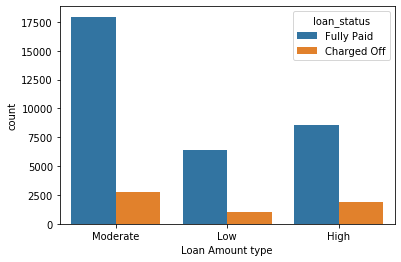

In [113]:
sns.countplot(x='loan_amount_type',hue='loan_status',data=df)
plt.xlabel('Loan Amount type')
plt.show()

In [76]:
print('Charged off customers in moderate loan amount are: {}%'.format(mod_co))
print('Charged off customers in High loan amount are: {}%'.format(high_co))
print('Charged off customers in Low loan amount are: {}%'.format(low_co))

Charged off customers in moderate loan amount are: 13.18%
Charged off customers in High loan amount are: 17.93%
Charged off customers in Low loan amount are: 13.8%


Customers who take loans higher than 15000, tend to default more than lower loan customers

In [87]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,income_type,loan_amount_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,3,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,1,INDIVIDUAL,0,0,Low,Moderate
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,3,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,1,INDIVIDUAL,0,0,Low,Low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,2,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,1,INDIVIDUAL,0,0,Low,Low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0,Low,Moderate
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,9,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,1,INDIVIDUAL,0,0,Low,Moderate


Looking at how the loan amount varies as per annual income the customers\
As found out earlier that 98.5% of the customers have income **less than 2 Lacs**. So we will restrict our dataframe to these 98.5% of the customers in the following analysis

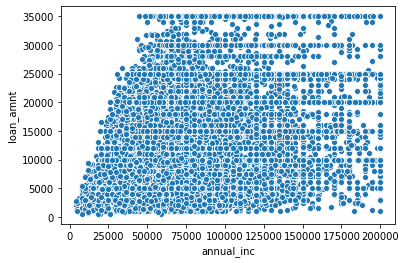

In [86]:
sns.scatterplot(x='annual_inc',y='loan_amnt',x_bins=5,y_bins=3,data=df[df['annual_inc']<=200000])
plt.show()

Hence there is almost zero correlation between these 2 variables

Hence there is almost zero correlation between these 2 variables